# Data Loading & Exploratory Data Analysis (EDA)

## Objective
The objective of this notebook is to load the job market dataset, understand its structure, and perform exploratory data analysis to identify trends in job roles, salaries, experience levels, and locations.


In [2]:
import pandas as pd

df = pd.read_csv("/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Select Features (X) and Target (y)

In [3]:
X = df[
    [
        "experience_level",
        "employment_type",
        "job_title",
        "company_location",
        "company_size",
        "remote_ratio",
        "work_year"
    ]
]

y = df["salary_in_usd"]

Check Feature DataTypes

In [4]:
X.dtypes

,0
experience_level,object
employment_type,object
job_title,object
company_location,object
company_size,object
remote_ratio,int64
work_year,int64


Encode Categorical Variables

In [5]:
X_encoded = pd.get_dummies(X, drop_first=True)

Verify Encoded Data

In [6]:
X_encoded.shape

(607, 108)

In [7]:
X_encoded.head()

,remote_ratio,work_year,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,0,2020,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,2020,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,50,2020,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,2020,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,50,2020,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


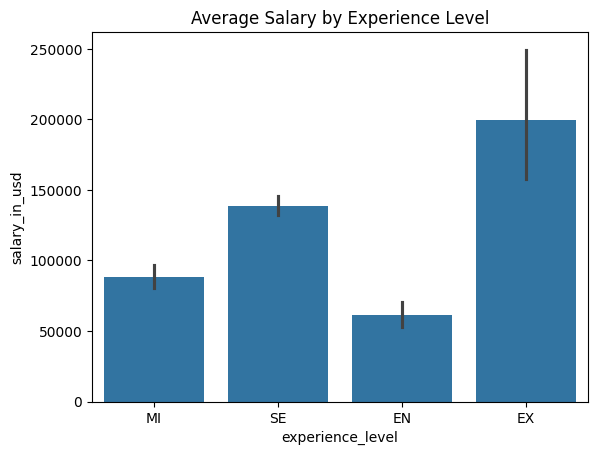

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=df["experience_level"],
    y=df["salary_in_usd"]
)
plt.title("Average Salary by Experience Level")
plt.show()
